In [141]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib as plt

In [2]:
means = np.load("MEANS.npy")
stds =  np.load("STDS.npy")
X_train =  np.load("X_train.npy")
X_val =  np.load("X_val.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")

In [3]:
print(stds.shape, means.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(164,) (164,)
(54719, 128, 164) (54719, 128)
(7236, 128, 164) (7236, 128)


In [143]:
def plot_hand(landmarks):
    
    # Separate x and y coordinates
    # x_coords = landmarks[0::2]  # take every 2nd number starting from 0
    # y_coords = landmarks[1::2]  # take every 2nd number starting from 1
    
    length_landmarks = len(landmarks)
    
    x_coords = landmarks[0:int(length_landmarks/2)]  
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]
    
    
    # Plotting the points
    plt.pyplot.figure(figsize=(5, 5))
    plt.pyplot.scatter(x_coords, y_coords)

    # Connect the points with lines to represent the structure of the hand
    # Order of connections might vary based on how landmarks are structured
    connections = [(0, 1), (1, 2), (2, 3), (3, 4),  # thumb
                (0, 5), (5, 6), (6, 7), (7, 8),  # index
                (0, 9), (9, 10), (10, 11), (11, 12),  # middle
                (0, 13), (13, 14), (14, 15), (15, 16),  # ring
                (0, 17), (17, 18), (18, 19), (19, 20)]  # pinky

    for connection in connections:
        plt.pyplot.plot([x_coords[connection[0]], x_coords[connection[1]]],
                [y_coords[connection[0]], y_coords[connection[1]]], 'r')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    plt.pyplot.show()


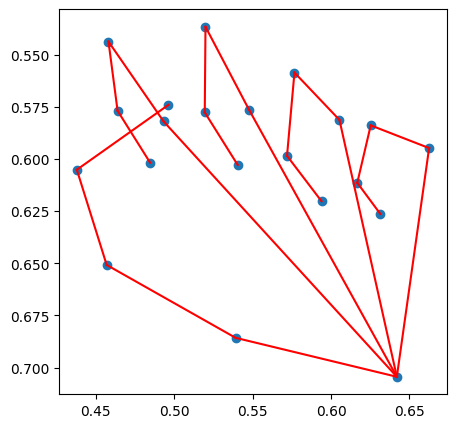

In [144]:
land = X_val[6, 60, 0:42]
plot_hand(land)

In [72]:
land = X_val[6, 55, 0:42]
print(len(land))
len1 = land[0:int(len(land)/2)]
len2 = land[int(len(land)/2):len(land)]
print(len(len1))
print(len(len2))
len1

42
21
21


array([0.6391141 , 0.5302454 , 0.44158596, 0.4122304 , 0.46623328,
       0.49218515, 0.49495608, 0.47875845, 0.47549638, 0.5534987 ,
       0.5592753 , 0.5400868 , 0.53660506, 0.6139711 , 0.6124764 ,
       0.5944644 , 0.58315873, 0.6644559 , 0.66409916, 0.653773  ,
       0.64441615], dtype=float32)

In [73]:
len2

array([0.69325393, 0.6874218 , 0.6617274 , 0.63820875, 0.6392939 ,
       0.571044  , 0.5143846 , 0.5071046 , 0.5163979 , 0.5718553 ,
       0.5164046 , 0.50783265, 0.51388055, 0.5860846 , 0.5473301 ,
       0.54601127, 0.5483379 , 0.6097387 , 0.60479206, 0.6123074 ,
       0.6153001 ], dtype=float32)

In [145]:
def plot_hand_point(landmarks):
    
    # Separate x and y coordinates
    # x_coords = landmarks[0::2]  # take every 2nd number starting from 0
    # y_coords = landmarks[1::2]  # take every 2nd number starting from 1
    
    length_landmarks = len(landmarks)
    
    x_coords = landmarks[0:int(length_landmarks/2)]  
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]
        
    # Plotting the points
    plt.pyplot.figure(figsize=(5, 5))
    plt.pyplot.scatter(x_coords, y_coords)



    plt.pyplot.scatter(x_coords, y_coords, color='black')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    plt.pyplot.show()

In [99]:
land = X_val[6, 55, 0:42]
print(len(land))
len1 = land[0:int(len(land)/2)]
len2 = land[int(len(land)/2):len(land)]
print(len(len1))
print(len(len2))
len1

42
21
21


array([0.6391141 , 0.5302454 , 0.44158596, 0.4122304 , 0.46623328,
       0.49218515, 0.49495608, 0.47875845, 0.47549638, 0.5534987 ,
       0.5592753 , 0.5400868 , 0.53660506, 0.6139711 , 0.6124764 ,
       0.5944644 , 0.58315873, 0.6644559 , 0.66409916, 0.653773  ,
       0.64441615], dtype=float32)

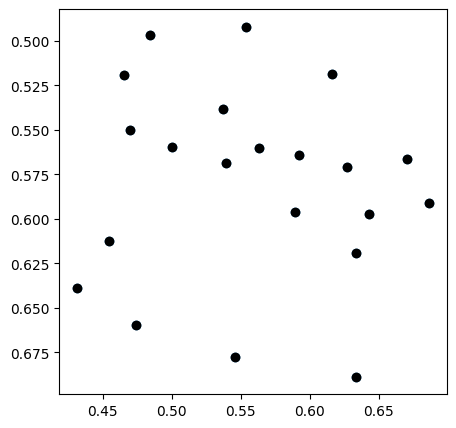

In [146]:
land = X_val[6, 58, 0:42]
plot_hand_point(land)

In [147]:
def save_hand_point(landmarks, name_file="hand_plot.png", size=300):

    # Separate x and y coordinates
    length_landmarks = len(landmarks)

    x_coords = landmarks[0:int(length_landmarks/2)]
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]

    # Create figure with size in pixels
    dpi = 80 # Using a standard value for DPI
    fig = plt.pyplot.figure(figsize=(size / dpi, size / dpi), dpi=dpi)
    
    # Plotting the points
    plt.pyplot.scatter(x_coords, y_coords, color='black')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    # Turn off the axes
    plt.pyplot.axis('off')

    plt.pyplot.savefig(name_file, dpi=dpi, pad_inches=0)
    plt.pyplot.close()

In [148]:
land = X_val[6, 58, 0:42]
save_hand_point(land, "hand_plot.png", 300)

In [153]:
def save_plot_hand(landmarks, name_file="hand_plot.png", size=300):
    
    # Separate x and y coordinates
    length_landmarks = len(landmarks)
    x_coords = landmarks[0:int(length_landmarks/2)]  
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]

    # Create figure with size in pixels
    dpi = 80 # Using a standard value for DPI
    fig = plt.pyplot.figure(figsize=(size / dpi, size / dpi), dpi=dpi)
    
    # Plotting the points
    plt.pyplot.scatter(x_coords, y_coords, color='black')

    # Connect the points with lines to represent the structure of the hand
    connections = [(0, 1), (1, 2), (2, 3), (3, 4),  # thumb
                (0, 5), (5, 6), (6, 7), (7, 8),  # index
                (0, 9), (9, 10), (10, 11), (11, 12),  # middle
                (0, 13), (13, 14), (14, 15), (15, 16),  # ring
                (0, 17), (17, 18), (18, 19), (19, 20)]  # pinky

    for connection in connections:
        plt.pyplot.plot([x_coords[connection[0]], x_coords[connection[1]]],
                [y_coords[connection[0]], y_coords[connection[1]]], 'r')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    # Turn off the axes
    plt.pyplot.axis('off')

    plt.pyplot.savefig(name_file, dpi=dpi, pad_inches=0)
    plt.pyplot.close()


In [154]:
land = X_val[6, 58, 0:42]
save_plot_hand(land, "hand_plot.png", 300)

In [164]:
def save_lip_point(landmarks, name_file="hand_plot.png", size=300):
    
    # Separate x and y coordinates
    # x_coords = landmarks[0::2]  # take every 2nd number starting from 0
    # y_coords = landmarks[1::2]  # take every 2nd number starting from 1

    # Separate x and y coordinates
    length_landmarks = len(landmarks)

    x_coords = landmarks[0:int(length_landmarks/2)]
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]

    # Create figure with size in pixels
    dpi = 80 # Using a standard value for DPI
    fig = plt.pyplot.figure(figsize=(size / dpi, size / dpi), dpi=dpi)
    
    # Plotting the points
    plt.pyplot.scatter(x_coords, y_coords, color='black')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    # Turn off the axes
    plt.pyplot.axis('off')

    plt.pyplot.savefig(name_file, dpi=dpi, pad_inches=0)
    plt.pyplot.close()

In [131]:
len(X_val[6, 58, :])

164

In [130]:
len(X_val[6, 58, 0:42])

42

In [132]:
len(X_val[6, 58, 42:84])

42

In [134]:
len(X_val[6, 58, 84:len(X_val[6, 58, :])])

80

In [170]:
land = X_val[3, 12, 84:len(X_val[6, 58, :])]
save_lip_point(land, "lips_plot.png", 300)

In [206]:
def plot_lips(landmarks, name_file="lips_plot.png", size=300):
    
    # Separate x and y coordinates
    length_landmarks = len(landmarks)
    x_coords = landmarks[0:int(length_landmarks/2)]  
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]

    # Create figure with size in pixels
    dpi = 80 # Using a standard value for DPI
    fig = plt.pyplot.figure(figsize=(size / dpi, size / dpi), dpi=dpi)
    
    # Plotting the points
    plt.pyplot.scatter(x_coords, y_coords, color='black')

    # Connect the points with lines to represent the structure of the lips
    connections = \
    [   (7, 17), (17, 15), (15, 19), (19, 12), (12, 3), (3, 30), (30, 37), (37, 33), (33, 35), (35, 25),  # low_low_lip
        (7, 20), (20, 6), (6, 5), (5, 4), (4, 0), (0, 22), (22, 23), (23, 24), (24, 38), (38, 25),  # up_up_lip
        (7, 8), (8, 21), (21, 9), (9, 10), (10, 11), (11, 1), (1, 29), (29, 28), (28, 27), (27, 39),(39, 26), (26, 25),  # low_up_lip
        (7, 8), (8, 16), (16, 14), (14, 18), (18, 13), (13, 2), (2, 31), (31, 36), (36, 32), (32, 34),(34, 26), (26, 25) ]  # up_lower_lip
                
    for connection in connections:
        plt.pyplot.plot([x_coords[connection[0]], x_coords[connection[1]]],
                [y_coords[connection[0]], y_coords[connection[1]]], 'r')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    # Turn off the axes
    plt.pyplot.axis('off')

    plt.pyplot.savefig(name_file, dpi=dpi, pad_inches=0)
    plt.pyplot.close()

In [208]:
land = X_val[6, 58, 84:len(X_val[6, 58, :])]
plot_lips(land, "lips_plot.png", 300)

In [189]:
def plot_hand_point_debug(landmarks):
    print(len(landmarks))
    
    # Separate x and y coordinates
    length_landmarks = len(landmarks)
    x_coords = landmarks[0:int(length_landmarks/2)]  
    y_coords = landmarks[int(length_landmarks/2):length_landmarks]
    
    # Plotting the points
    plt.pyplot.figure(figsize=(5, 5))
    plt.pyplot.scatter(x_coords, y_coords, color='black')

    # Annotate each point with its index
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.pyplot.annotate(i, (x, y), fontsize=12, ha='right')

    # Inverting y axis for better visualization
    plt.pyplot.gca().invert_yaxis()

    plt.pyplot.show()

80


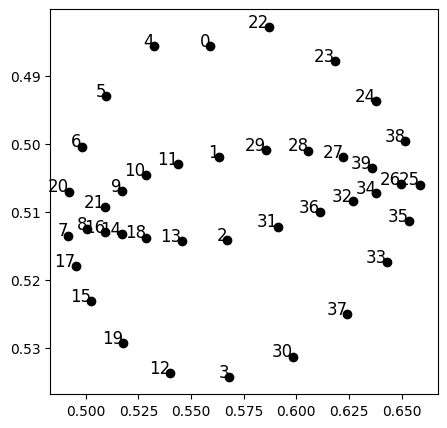

In [200]:
land = X_val[11, 11, 84:len(X_val[6, 58, :])]
plot_hand_point_debug(land)